In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Importing The Dataset

### Feature Description

* ph: pH of 1. water (0 to 14).

* Hardness: Capacity of water to precipitate soap in mg/L.

* Solids: Total dissolved solids in ppm.

* Chloramines: Amount of Chloramines in ppm.

* Sulfate: Amount of Sulfates dissolved in mg/L.

* Conductivity: Electrical conductivity of water in μS/cm.

* Organic_carbon: Amount of organic carbon in ppm.

* Trihalomethanes: Amount of Trihalomethanes in μg/L.

* Turbidity: Measure of light emiting property of water in NTU.

* Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

### Importing

In [81]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [83]:
df.isnull().sum().sum()

1434

In [84]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [85]:
df = df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [86]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [87]:
df_notpotable  = df[df['Potability']==0]
df_potable = df[df['Potability']==1]

df_notpotable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [88]:
df_potable_resample = resample(df_potable, replace = True, n_samples = 1200, random_state = 0)

In [89]:
df = pd.concat([df_notpotable, df_potable_resample])
df.Potability.value_counts()

1    1200
0    1200
Name: Potability, dtype: int64

In [90]:
df = shuffle(df, random_state=0) 

# EDA

C:\Users\sahil\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

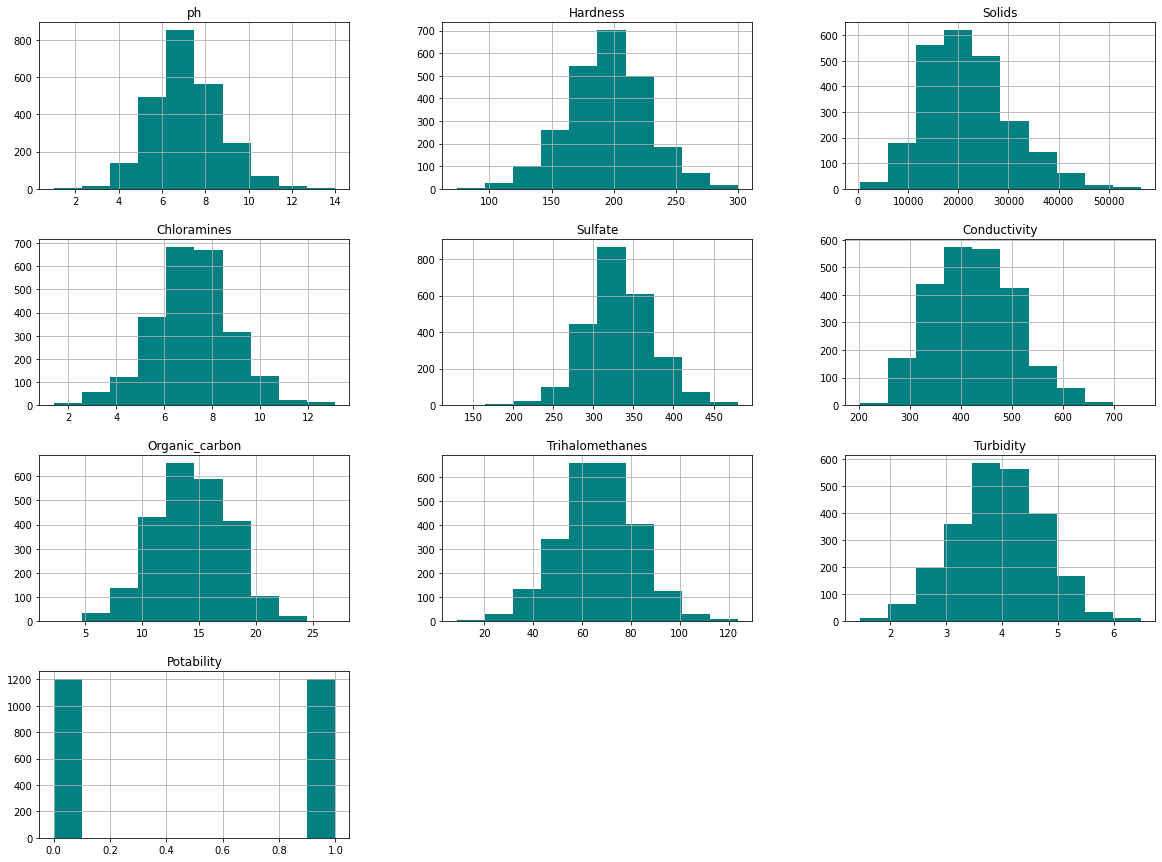

In [91]:
df.hist(bins=10, figsize=(20,15), color = 'teal')

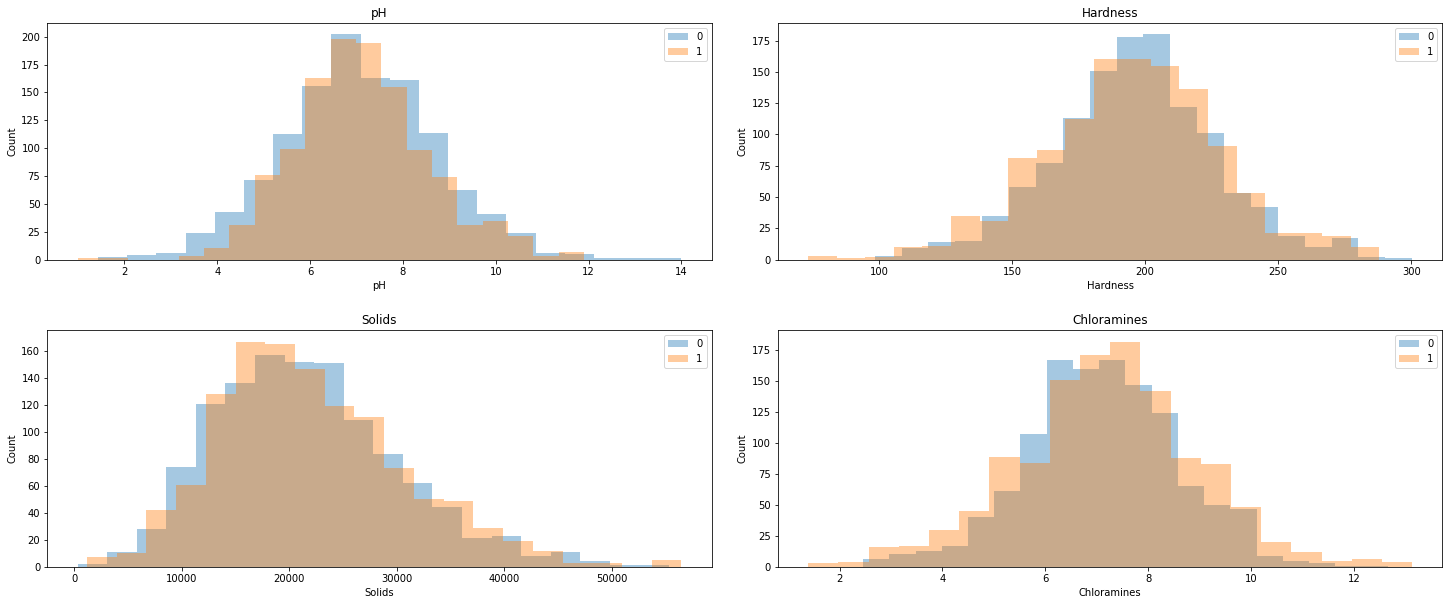

In [92]:
fig = plt.figure(figsize=(25,10))
 
p1 = fig.add_subplot(2,2,1)
p1.hist(df.ph[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.ph[df.Potability == 1], bins=20, alpha = .4)
plt.title('pH')
plt.xlabel('pH')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,2)
p1.hist(df.Hardness[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Hardness[df.Potability == 1], bins=20, alpha = .4)
plt.title('Hardness')
plt.xlabel('Hardness')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,3)
p1.hist(df.Solids[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Solids[df.Potability == 1], bins=20, alpha = .4)
plt.title('Solids')
plt.xlabel('Solids')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,4)
p1.hist(df.Chloramines[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Chloramines[df.Potability == 1], bins=20, alpha = .4)
plt.title('Chloramines')
plt.xlabel('Chloramines')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)
 
plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

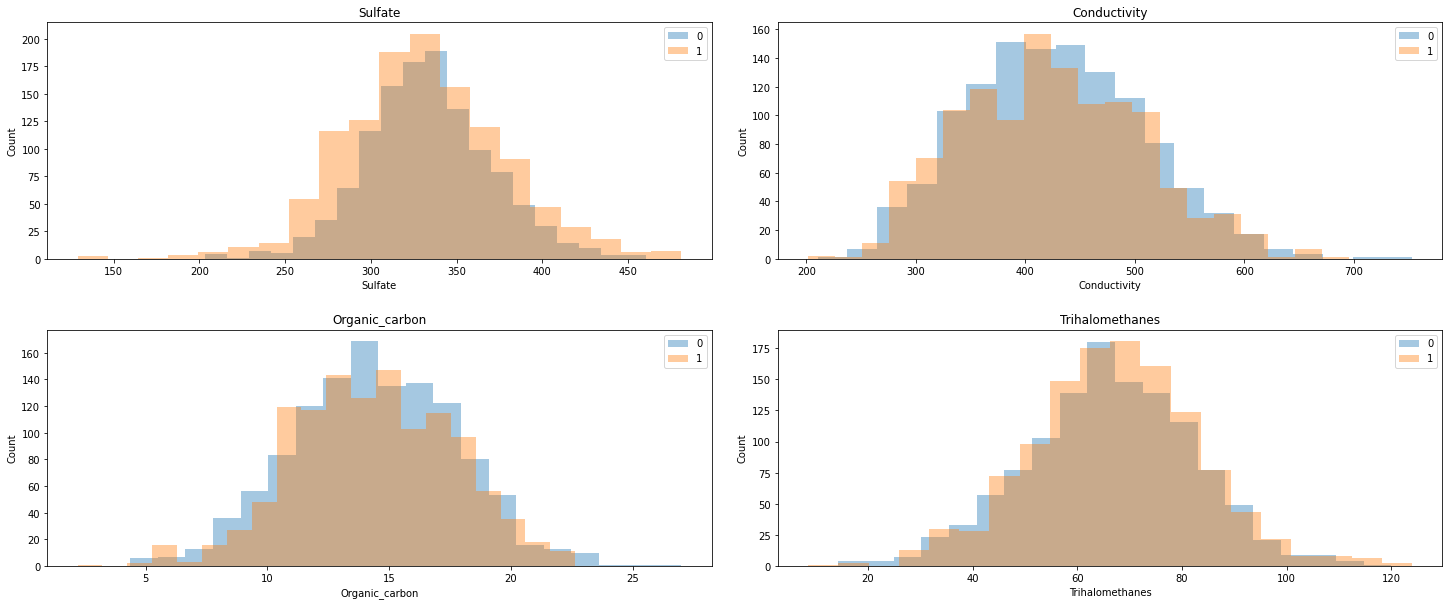

In [93]:
fig = plt.figure(figsize=(25,10))

p1 = fig.add_subplot(2,2,1)
p1.hist(df.Sulfate[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Sulfate[df.Potability == 1], bins=20, alpha = .4)
plt.title('Sulfate')
plt.xlabel('Sulfate')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,2)
p1.hist(df.Conductivity[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Conductivity[df.Potability == 1], bins=20, alpha = .4)
plt.title('Conductivity')
plt.xlabel('Conductivity')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,3)
p1.hist(df.Organic_carbon[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Organic_carbon[df.Potability == 1], bins=20, alpha = .4)
plt.title('Organic_carbon')
plt.xlabel('Organic_carbon')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

p1 = fig.add_subplot(2,2,4)
p1.hist(df.Trihalomethanes[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Trihalomethanes[df.Potability == 1], bins=20, alpha = .4)
plt.title('Trihalomethanes')
plt.xlabel('Trihalomethanes')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

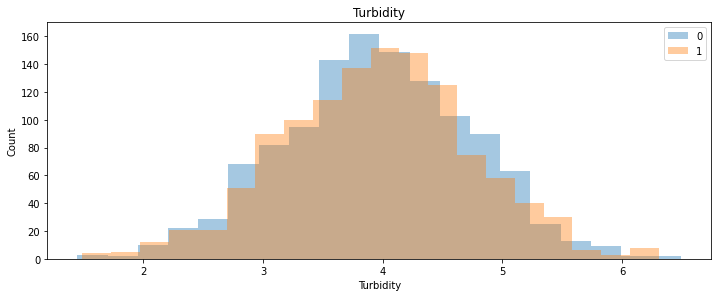

In [94]:
fig = plt.figure(figsize=(25,10))

p1 = fig.add_subplot(2,2,1)
p1.hist(df.Turbidity[df.Potability == 0], bins=20, alpha = .4)
p1.hist(df.Turbidity[df.Potability == 1], bins=20, alpha = .4)
plt.title('Turbidity')
plt.xlabel('Turbidity')
plt.ylabel('Count')
labels = ["0", "1"]
plt.legend(labels)

plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

C:\Users\sahil\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


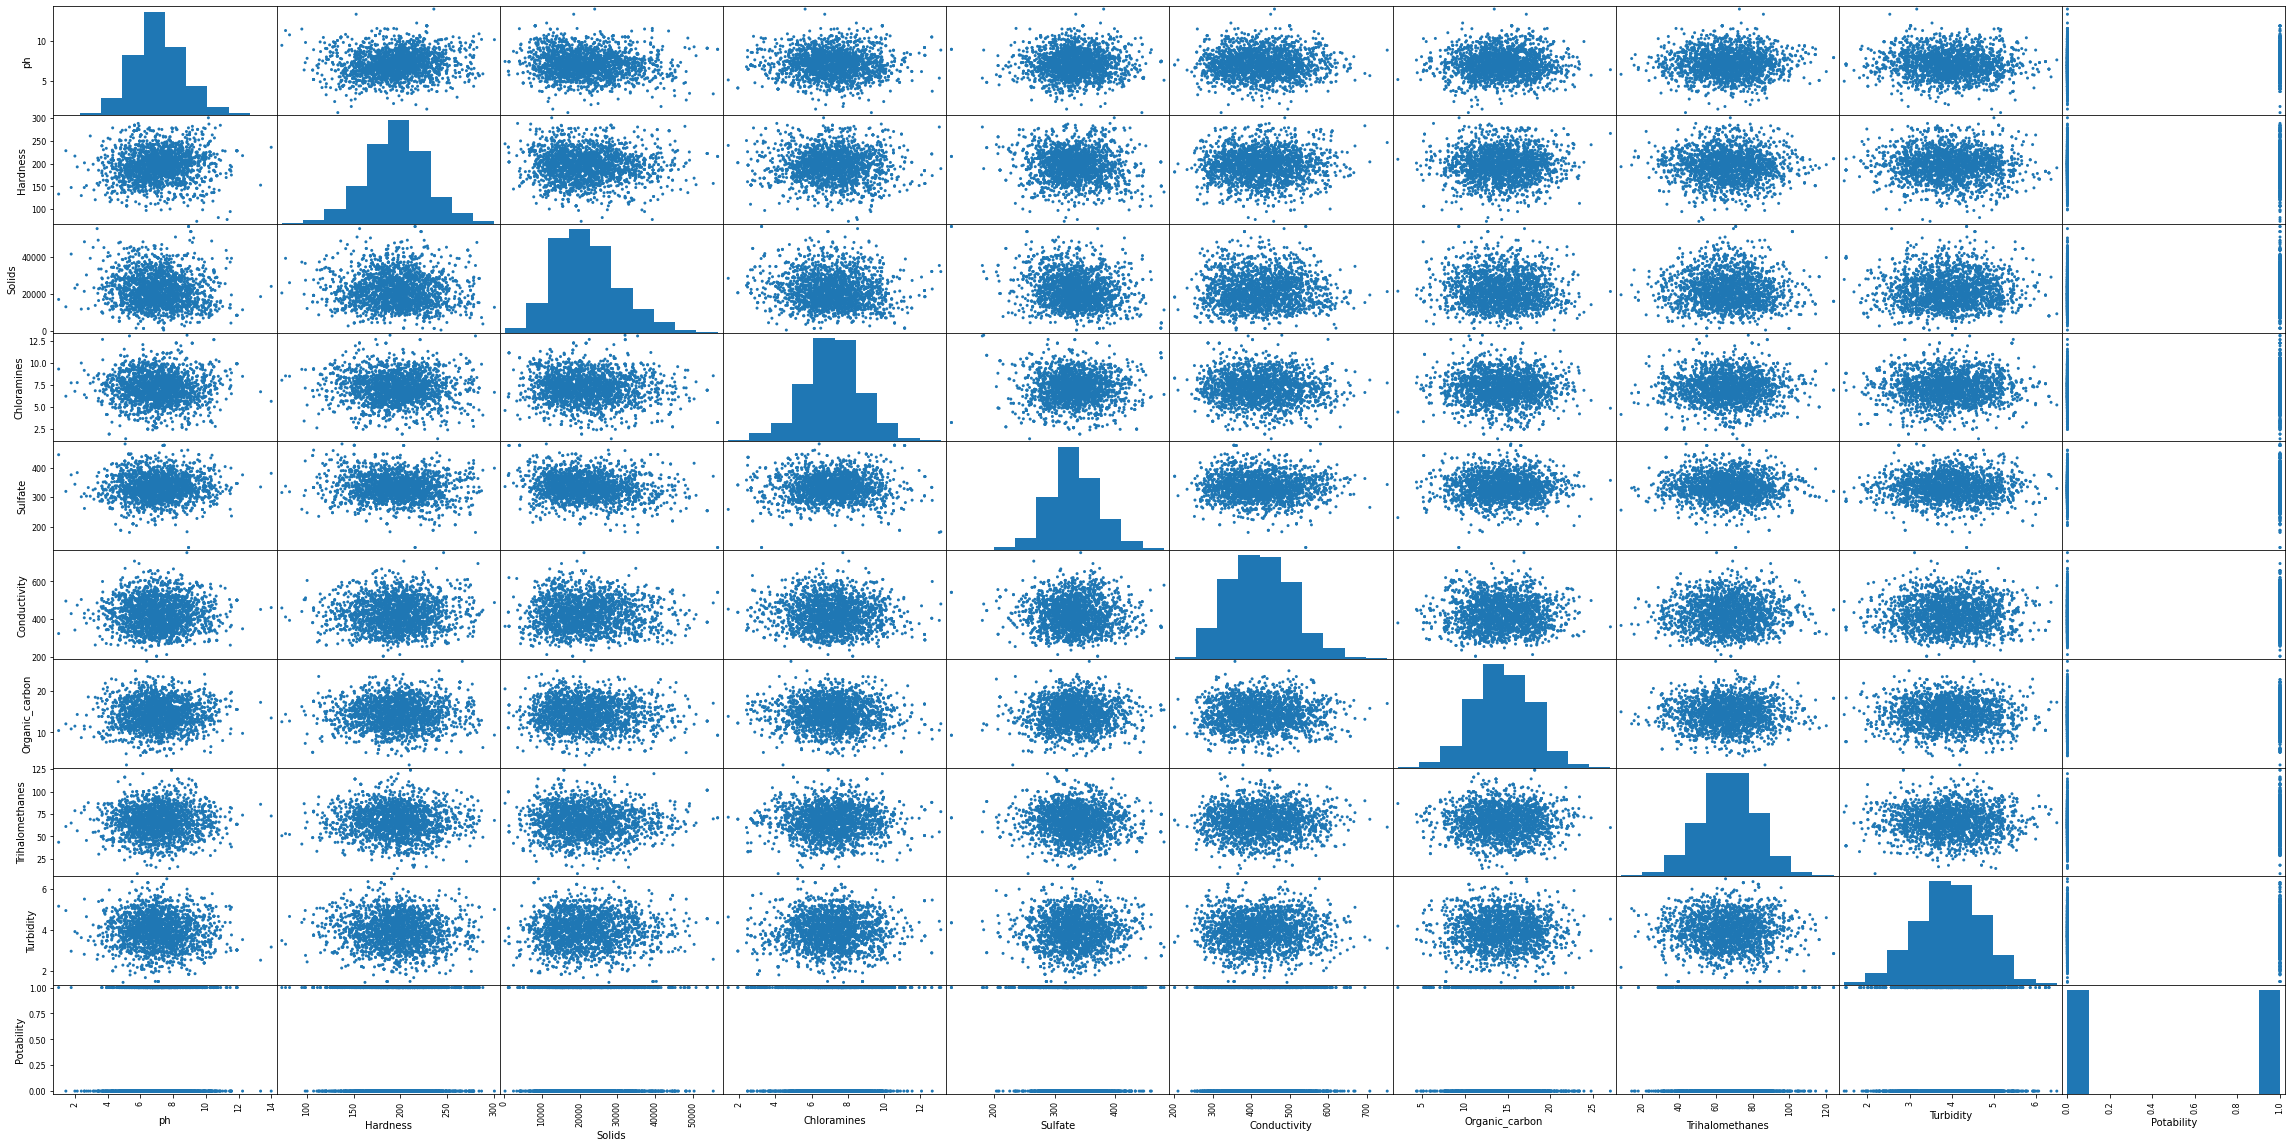

In [95]:
from pandas.plotting import scatter_matrix
x = scatter_matrix(df, alpha=1, figsize=(40, 20), diagonal='hist')

<AxesSubplot:>

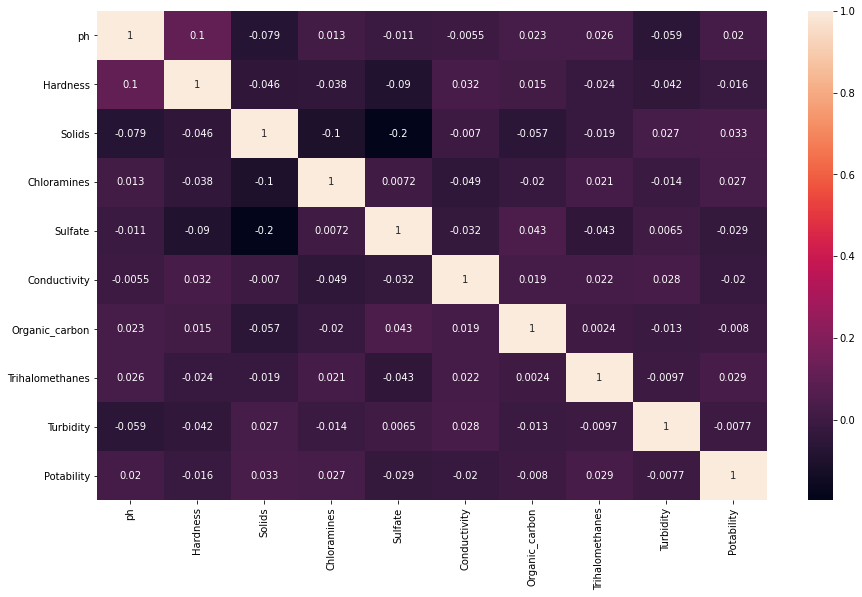

In [96]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

In [97]:
df_corr = df.corr()
df_corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033281
Trihalomethanes    0.029260
Chloramines        0.027323
ph                 0.019509
Turbidity         -0.007687
Organic_carbon    -0.007996
Hardness          -0.016310
Conductivity      -0.019942
Sulfate           -0.029005
Name: Potability, dtype: float64

# Deep Learning

In [98]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score

In [99]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [100]:
st = StandardScaler()
x_columns= x.columns
x[x_columns] = st.fit_transform(x[x_columns])

In [101]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3225,0.886836,-1.959760,-0.101990,0.520706,0.298084,-0.811575,-1.094072,-0.140666,-1.367187
561,-0.305747,-0.728478,-0.819385,-0.044076,0.141303,-0.249905,0.386441,-0.515110,0.490391
2322,1.334503,1.427180,0.728499,-0.203641,-1.672090,1.768747,-1.884166,-1.163543,-0.518518
1977,0.050960,0.336155,0.451849,0.394043,-0.268781,0.736269,0.361951,-1.107368,1.012251
973,-1.715971,1.389395,0.251030,1.603773,0.132009,1.341039,-0.752171,0.144341,1.388621


In [102]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,4.759156e-16,2.194194e-16,9.917992e-17,-5.098844e-16,-1.073169e-15,-2.924512e-16,-5.870420e-16,-1.930324e-16,5.284199e-16
std,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,-3.949555e+00,-3.793180e+00,-2.514301e+00,-3.531082e+00,-4.864670e+00,-2.784957e+00,-3.668361e+00,-3.661512e+00,-3.186855e+00
25%,-6.437116e-01,-5.884188e-01,-7.393425e-01,-6.051879e-01,-6.284983e-01,-7.554791e-01,-6.897268e-01,-6.315345e-01,-6.687663e-01
50%,-4.653725e-02,3.572745e-02,-1.225582e-01,2.938824e-03,-3.776914e-02,-4.298161e-02,-1.222659e-02,-1.652648e-04,2.578213e-03
75%,6.170089e-01,6.206727e-01,6.173876e-01,6.191037e-01,6.072930e-01,6.963691e-01,7.355617e-01,6.685573e-01,6.907318e-01
max,4.463777e+00,3.258894e+00,4.025774e+00,3.662361e+00,3.549411e+00,4.064490e+00,3.806757e+00,3.604225e+00,3.246077e+00


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [104]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test, test_size = 0.5, random_state = 0)

In [105]:
X_train.shape

(1920, 9)

In [106]:
# model = models.Sequential()

# model.add(layers.Dense(16, input_shape=(9,)))
# model.add(LeakyReLU(alpha=0.01))

# model.add(layers.Dense(32))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(rate=0.1))

# model.add(layers.Dense(16))
# model.add(BatchNormalization())
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(rate=0.1))

# model.add(layers.Dense(1))
# model.add(Activation("sigmoid"))

In [107]:
model = models.Sequential()

model.add(layers.Dense(16, input_shape=(9,)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(16))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(1))
model.add(Activation("sigmoid"))

In [108]:
opt = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [110]:
tf.random.set_seed(0)

history = model.fit(X_train,
                    Y_train,
                    epochs=300,
                    batch_size=32,
                    validation_data=(X_val, Y_val),
                   )

Epoch 1/300
60/60 [==============================] - 1s 3ms/step - loss: 0.7253 - accuracy: 0.5135 - val_loss: 0.6879 - val_accuracy: 0.5292
Epoch 2/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5260 - val_loss: 0.6820 - val_accuracy: 0.5792
Epoch 3/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5516 - val_loss: 0.6707 - val_accuracy: 0.6042
Epoch 4/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.5922 - val_loss: 0.6615 - val_accuracy: 0.6208
Epoch 5/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.6062 - val_loss: 0.6547 - val_accuracy: 0.5875
Epoch 6/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.6224 - val_loss: 0.6420 - val_accuracy: 0.6208
Epoch 7/300
60/60 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6266 - val_loss: 0.6336 - val_accuracy: 0.6083
Epoch 8/300
6

Epoch 59/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7661 - val_loss: 0.5635 - val_accuracy: 0.7000
Epoch 60/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7651 - val_loss: 0.5737 - val_accuracy: 0.7083
Epoch 61/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7542 - val_loss: 0.5623 - val_accuracy: 0.7125
Epoch 62/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7766 - val_loss: 0.5573 - val_accuracy: 0.7125
Epoch 63/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7766 - val_loss: 0.5461 - val_accuracy: 0.7167
Epoch 64/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7661 - val_loss: 0.5668 - val_accuracy: 0.7125
Epoch 65/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7740 - val_loss: 0.5513 - val_accuracy: 0.7125
Epoch 

60/60 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7974 - val_loss: 0.5637 - val_accuracy: 0.7625
Epoch 117/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.7974 - val_loss: 0.5639 - val_accuracy: 0.7542
Epoch 118/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.7948 - val_loss: 0.5678 - val_accuracy: 0.7333
Epoch 119/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8010 - val_loss: 0.5689 - val_accuracy: 0.7375
Epoch 120/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8010 - val_loss: 0.5688 - val_accuracy: 0.7333
Epoch 121/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7927 - val_loss: 0.5708 - val_accuracy: 0.7417
Epoch 122/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7943 - val_loss: 0.5632 - val_accuracy: 0.7625
Epoch 123/300

60/60 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8094 - val_loss: 0.5693 - val_accuracy: 0.7500
Epoch 174/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8115 - val_loss: 0.5642 - val_accuracy: 0.7417
Epoch 175/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8182 - val_loss: 0.5833 - val_accuracy: 0.7458
Epoch 176/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8052 - val_loss: 0.6032 - val_accuracy: 0.7417
Epoch 177/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8094 - val_loss: 0.6007 - val_accuracy: 0.7375
Epoch 178/300
60/60 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8031 - val_loss: 0.5785 - val_accuracy: 0.7375
Epoch 179/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8271 - val_loss: 0.5838 - val_accuracy: 0.7375
Epoch 180/300

60/60 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8156 - val_loss: 0.5655 - val_accuracy: 0.7542
Epoch 231/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8219 - val_loss: 0.5691 - val_accuracy: 0.7542
Epoch 232/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8260 - val_loss: 0.5471 - val_accuracy: 0.7708
Epoch 233/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8234 - val_loss: 0.5761 - val_accuracy: 0.7542
Epoch 234/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8380 - val_loss: 0.5705 - val_accuracy: 0.7333
Epoch 235/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8339 - val_loss: 0.5820 - val_accuracy: 0.7333
Epoch 236/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8328 - val_loss: 0.5778 - val_accuracy: 0.7458
Epoch 237/300

60/60 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8266 - val_loss: 0.5924 - val_accuracy: 0.7458
Epoch 288/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8385 - val_loss: 0.5957 - val_accuracy: 0.7458
Epoch 289/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8375 - val_loss: 0.6061 - val_accuracy: 0.7292
Epoch 290/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8469 - val_loss: 0.5786 - val_accuracy: 0.7542
Epoch 291/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8323 - val_loss: 0.5774 - val_accuracy: 0.7542
Epoch 292/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8297 - val_loss: 0.5868 - val_accuracy: 0.7583
Epoch 293/300
60/60 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8359 - val_loss: 0.5813 - val_accuracy: 0.7750
Epoch 294/300

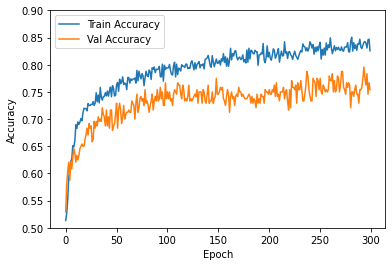

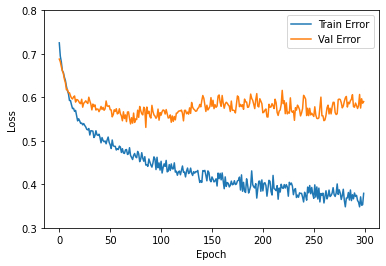

In [111]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.ylim([0.5,0.9])
  plt.legend()
  plt.show()
    
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0.3,0.8])
  plt.legend()
  plt.show()


plot_history(history)

In [112]:
score = model.evaluate(X_test, Y_test, verbose=1)

print("Test Error", score[0])
print("Test accuracy", score[1])

8/8 [==============================] - 0s 714us/step - loss: 0.5964 - accuracy: 0.7667
Test Error 0.5963586568832397
Test accuracy 0.7666666507720947


### Finally the Deep Learning Model :  with accuracy 70~75 %